In [12]:
import numpy as np
from qiskit import QuantumCircuit, execute, transpile
from qiskit.visualization import plot_histogram

# Create a Quantum Circuit acting on the q register
# Only 2 qubits here, will not measure
circuit = QuantumCircuit(2,2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Draw the circuit
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [13]:
# Load account credential sand then get connected to the cloud
from qiskit import IBMQ
provider = IBMQ.load_account()
# Print the list of available backends
from pprint import pprint
pprint(provider.backends())

ibmqfactory.load_account:WARNING:2021-04-26 14:27:10,318: Credentials are already in use. The existing account in the session will be replaced.


In [23]:
do_real_hw = True

if do_real_hw:
    # Get the least busy backend that has at least 2 qubits and is not a simulator
    from qiskit.providers.ibmq import least_busy
    backend = backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational==True))
else:
    # This is a simulator, rather than hardware
    backend = provider.get_backend('ibmq_qasm_simulator')

In [24]:
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, backend)

In [25]:
# Execute the circuit on the qasm simulator
job = execute(compiled_circuit, backend, shots=1000)

In [26]:
# Check the job status
from qiskit.tools.monitor import job_monitor
print(job.job_id())
job_monitor(job)

6086b46ce3c6c247d62d6c65
Job Status: job has successfully run



Total count for 00 and 11 are: {'00': 483, '01': 38, '10': 51, '11': 428}


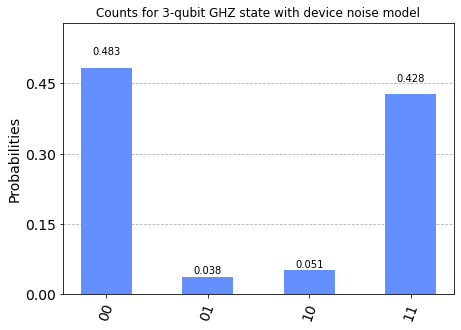

In [27]:
# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)
plot_histogram(counts,
               title="Counts for 3-qubit GHZ state with device noise model")